## Linear Regression

In [2]:
# 加载数据集
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd
bos_df = pd.DataFrame(boston.data,columns=boston.feature_names)

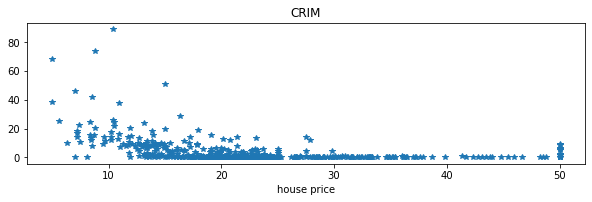

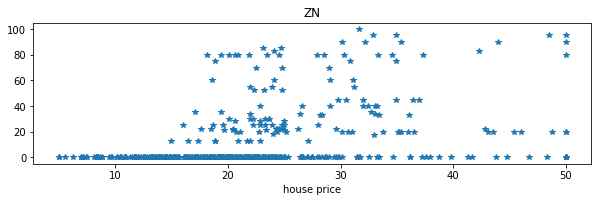

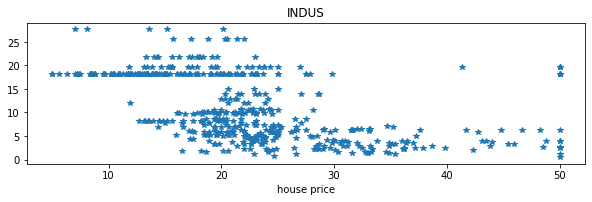

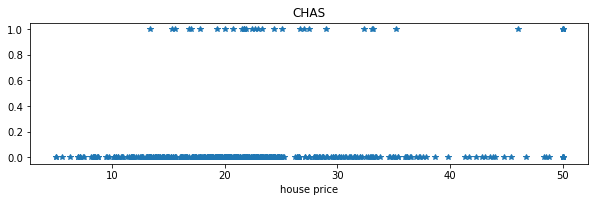

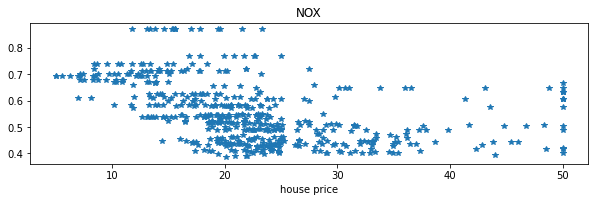

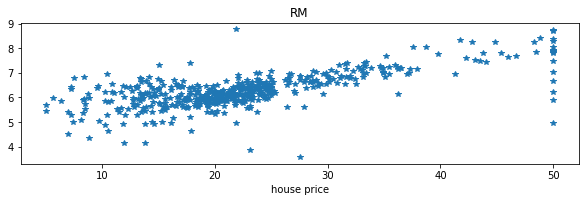

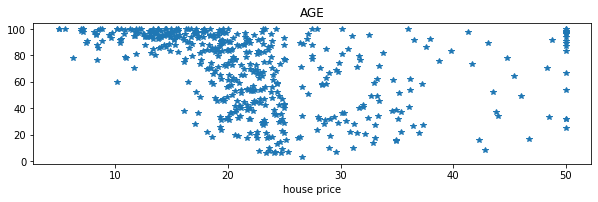

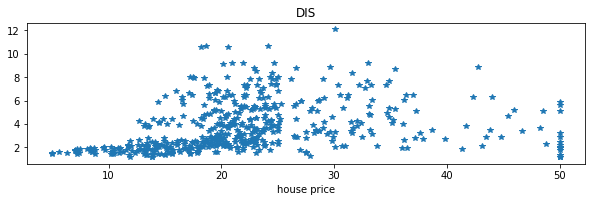

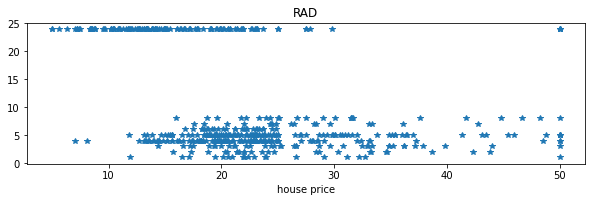

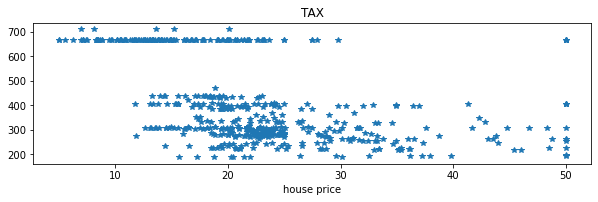

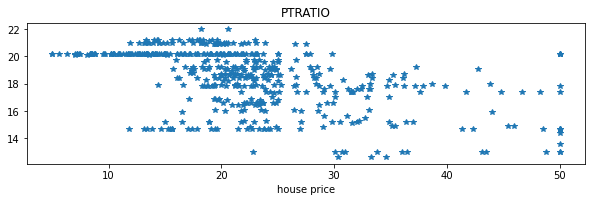

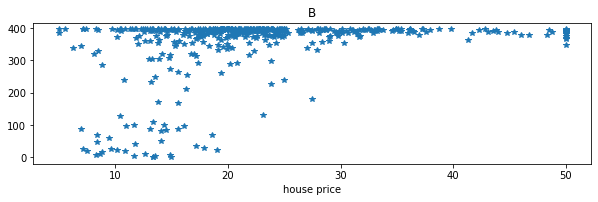

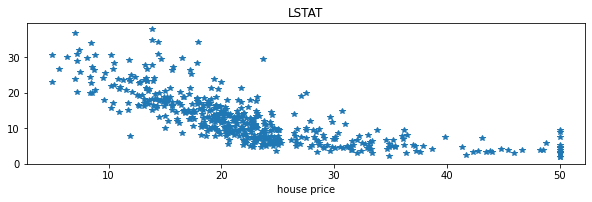

In [3]:
import matplotlib.pyplot as plt
for i in range(1,14):
    plt.figure(figsize=(10,40))
    plt.subplot(13, 1, i)
    plt.plot(boston.target, boston.data[:,i-1],'*')
    plt.title(boston.feature_names[i-1])
    plt.xlabel('house price')

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.3)

from sklearn.linear_model import LinearRegression
# LSTAT -1 RM -8
lm1 = LinearRegression()
# 如果在 train_test_split 是DataFrame bos_df就要用x_train.iloc[:,[-1,-8]]
# 如果是boston.data就可以直接切片
lm1.fit(x_train[:,[-1,-8]],y_train) 
r2_lm_LSTAT_RM = lm1.score(x_test[:,[-1,-8]],y_test)
print(r2_lm_LSTAT_RM)

# PTRAYTO TAX -4 -3
lm2 = LinearRegression()
lm2.fit(x_train[:,[-4,-3]],y_train) 
r2_lm_PTRAYTO_RM = lm2.score(x_test[:,[-4,-3]],y_test)
print(r2_lm_PTRAYTO_RM)

0.6043528191435394
0.3100106599190787


In [5]:
# all
lm = LinearRegression()
lm.fit(x_train,y_train) 
r2_lm_all = lm.score(x_test,y_test)
print(r2_lm_all)

# 截距 回归系数
lm.intercept_ # 截距
lm.coef_ # 回归系数

# 也可以 data=zip(boston.feature_names, lm.coef_)
lm_result = pd.DataFrame(data=list(zip(boston.feature_names, lm.coef_)), columns=['特征','特征对应系数']) 
print(lm_result)

0.6868448828504524
         特征     特征对应系数
0      CRIM  -0.121036
1        ZN   0.046846
2     INDUS   0.005065
3      CHAS   4.530547
4       NOX -15.820052
5        RM   4.390200
6       AGE  -0.014668
7       DIS  -1.389767
8       RAD   0.323268
9       TAX  -0.013230
10  PTRATIO  -0.785364
11        B   0.010793
12    LSTAT  -0.446608


## Ridge Regression

In [6]:
# 加载数据集
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd
bos_df = pd.DataFrame(boston.data,columns=boston.feature_names)

<AxesSubplot:>

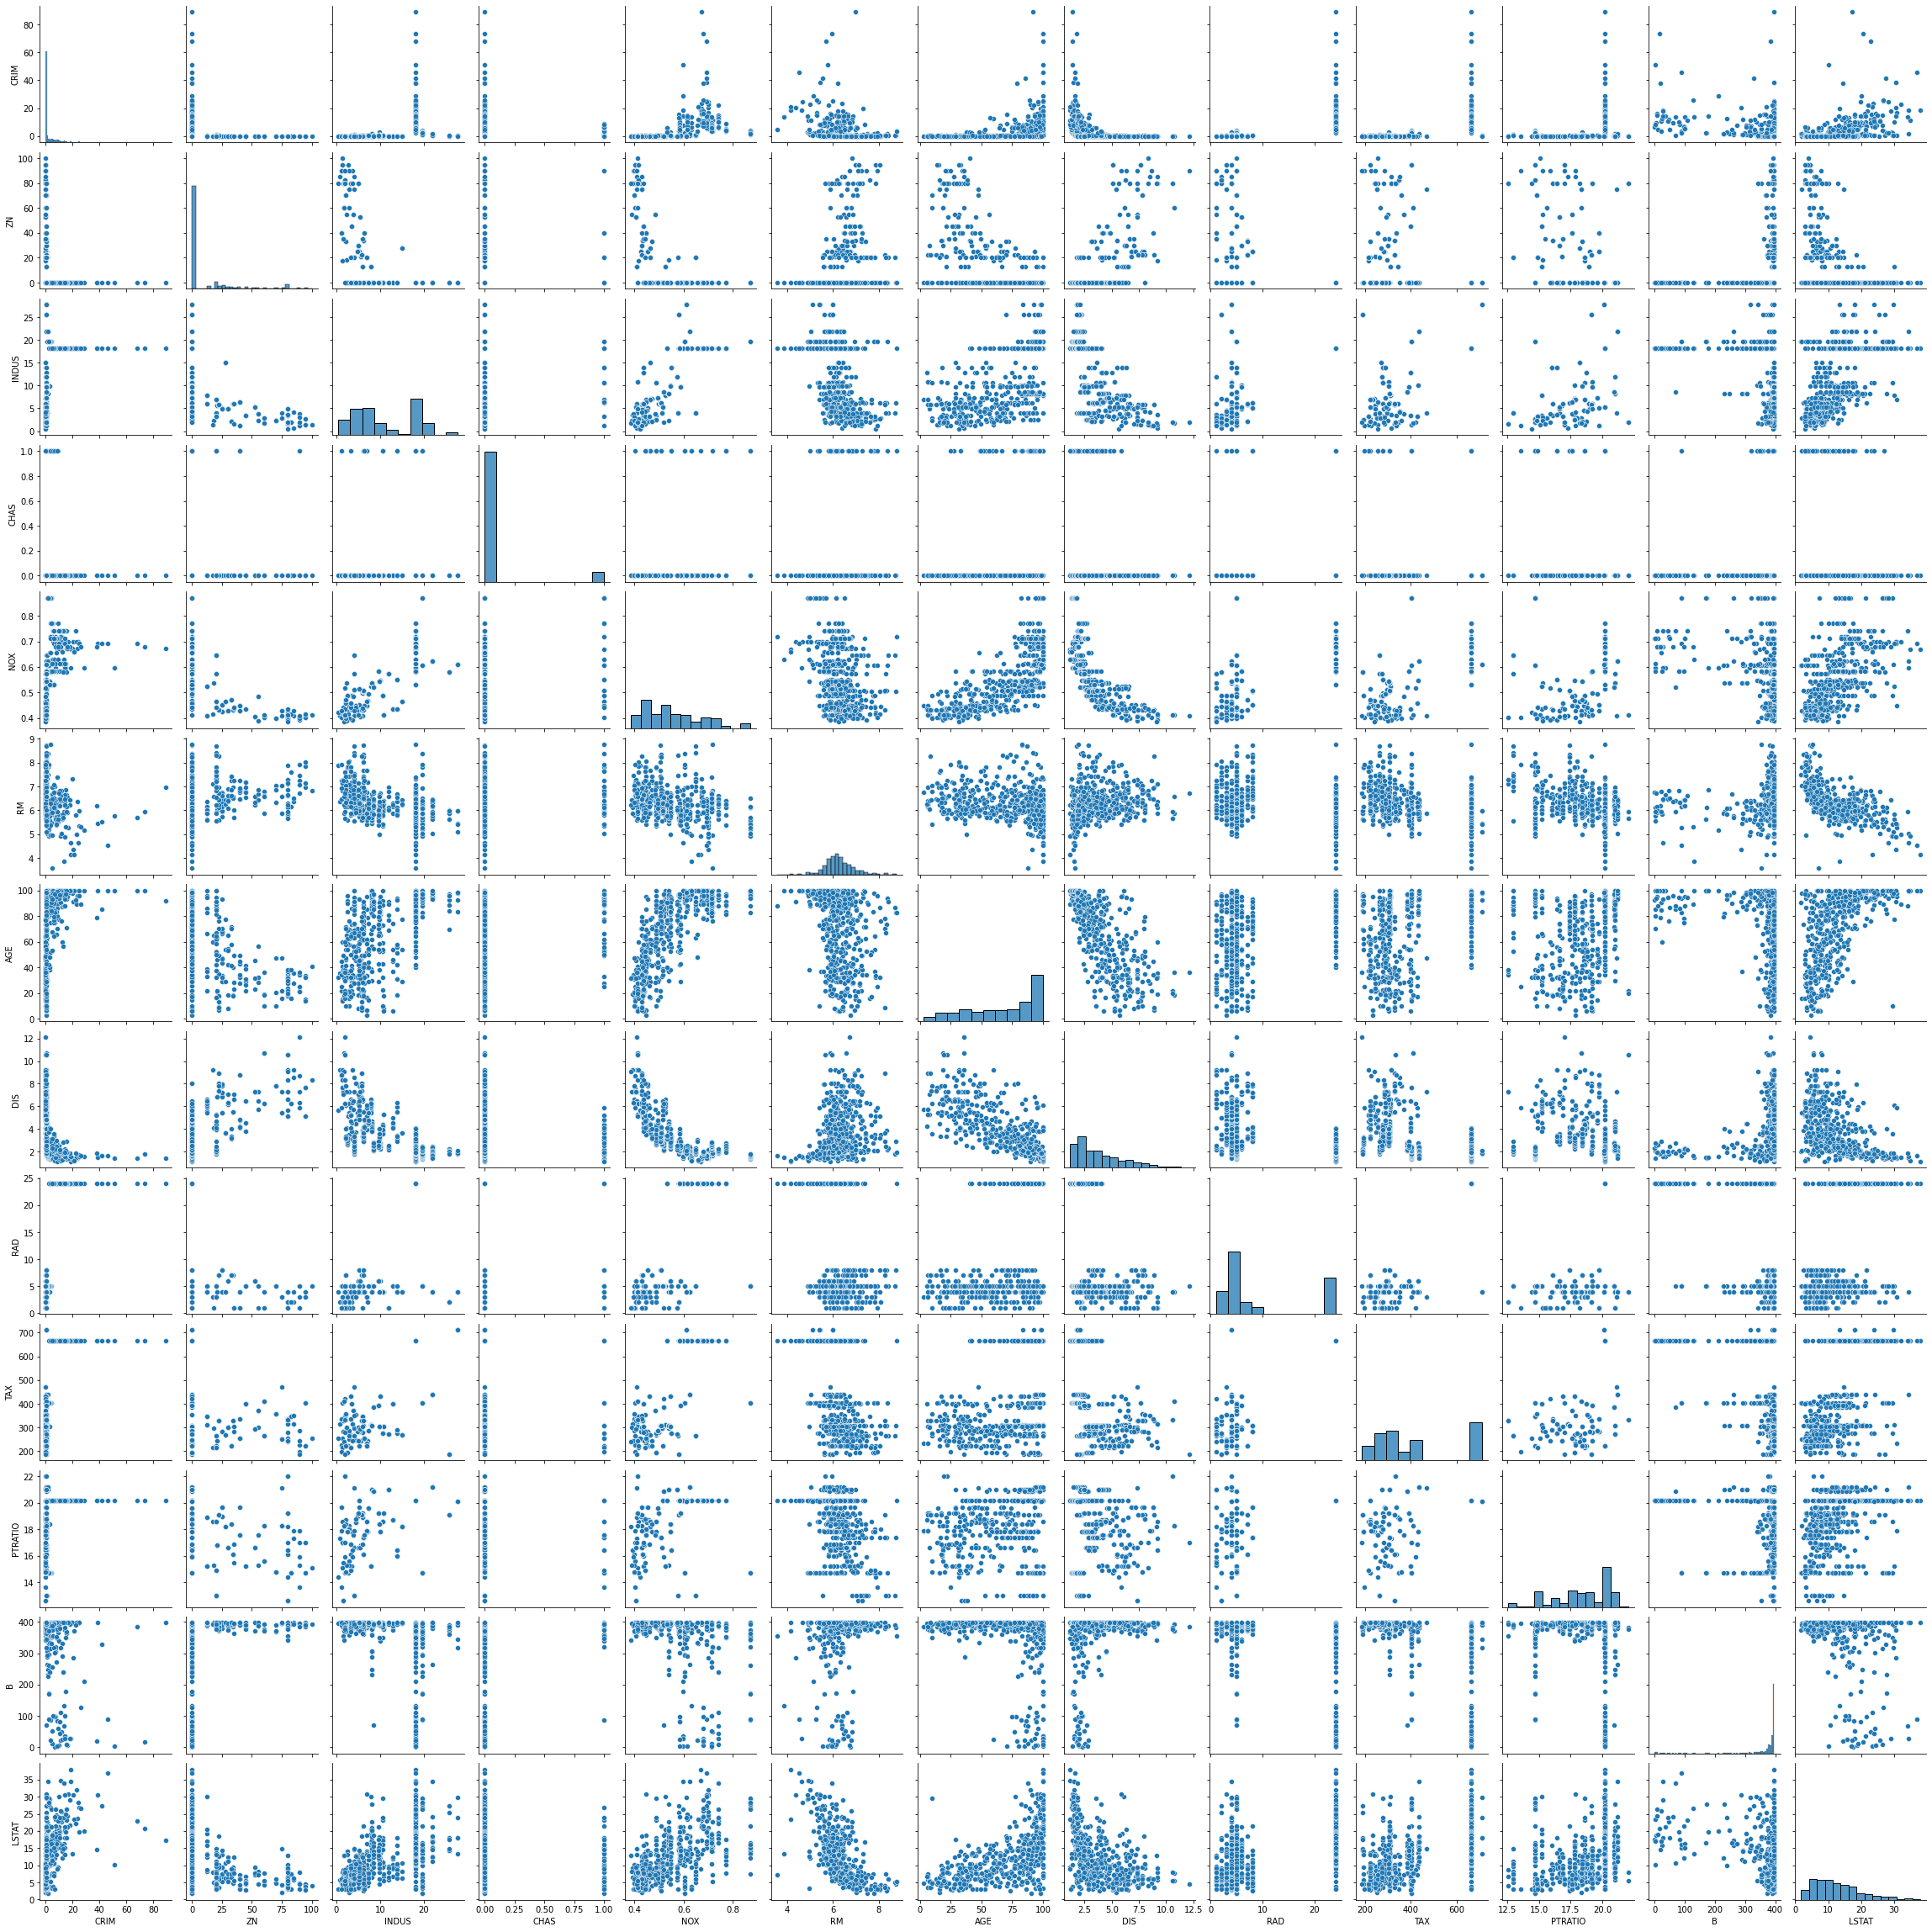

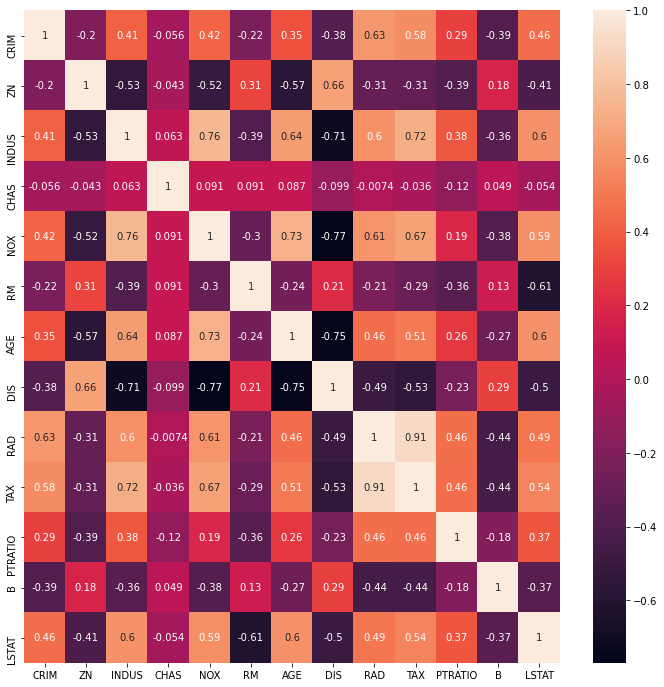

In [7]:
# 预处理
import seaborn as sns
sns.pairplot(bos_df)

import matplotlib.pyplot as plt
# 相关系数
corr_df = bos_df.corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_df, annot=True)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.3)

# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression().fit(x_train,y_train)
r2_lm = lm.score(x_test, y_test)
ms_lm = mean_squared_error(y_true=y_test, y_pred=lm.predict(x_test))

r2_lm, ms_lm

(0.7614634220777683, 21.9348358603434)

In [9]:
# ridge regression
from sklearn.linear_model import Ridge
lr = Ridge().fit(x_train, y_train)
r2_lr = lr.score(x_test, y_test)
ms_lr = mean_squared_error(y_true=y_test, y_pred=lr.predict(x_test))

r2_lr, ms_lr

(0.7607396424113584, 22.001391641096376)

In [10]:
# 交叉验证
import numpy as np
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-10,10,200)
lr_cv = RidgeCV(alphas=alphas).fit(x_train,y_train)
lr_cv.alphas # 就是alphas = np.logspace(-10,10,200)
lr_cv.alpha_ # 最佳的alpha

0.027682866303920722

<AxesSubplot:>

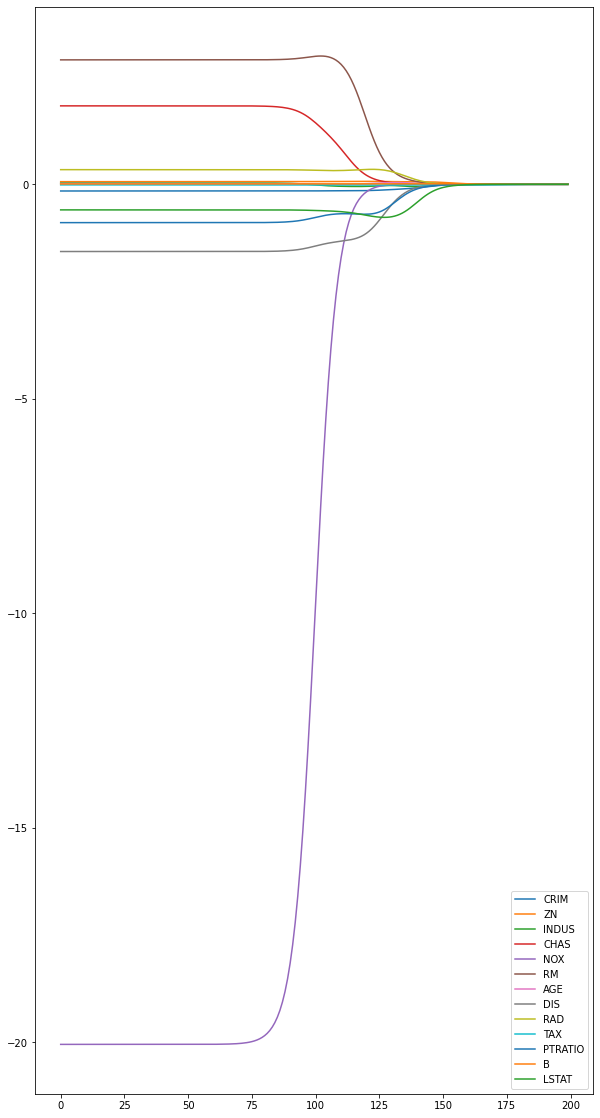

In [11]:
# 轨迹
df_coef = pd.DataFrame()
for alpha in alphas:
    ridge_clf = Ridge(alpha=alpha).fit(x_train, y_train)
    lr_coef = ridge_clf.coef_ # 系数
    df = pd.DataFrame([lr_coef], columns=boston.feature_names)
    df['alpha'] = alpha
    df_coef = df_coef.append(df, ignore_index=True)

# 绘制岭迹图
df_coef.iloc[:,:-1].plot(figsize=(10,20))

In [12]:
# 替换为最佳的alpha
lr = Ridge(alpha=lr_cv.alpha_).fit(x_train, y_train)
r2_lr = lr.score(x_test, y_test)
ms_lr = mean_squared_error(y_test, lr.predict(x_test))

r2_lm, r2_lr, ms_lm, ms_lr

(0.7614634220777683, 0.7616134277462864, 21.9348358603434, 21.921041960281087)

## LASSO Regression

<AxesSubplot:>

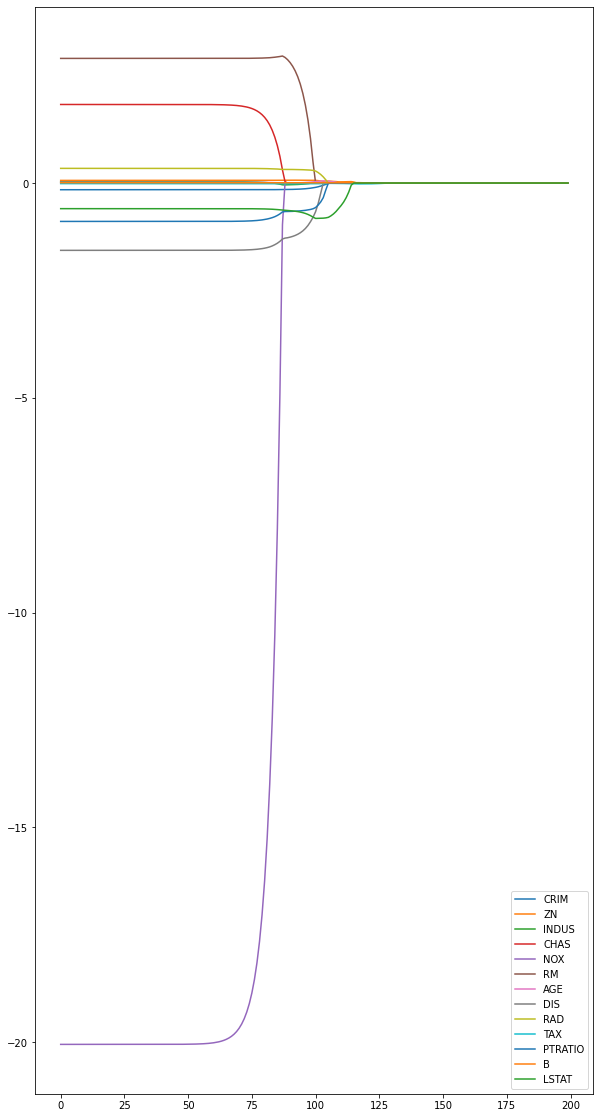

In [13]:
from sklearn.linear_model import Lasso
# lasso 轨迹
df_coef = pd.DataFrame()
for alpha in alphas:
    lasso_clf = Lasso(alpha=alpha).fit(x_train, y_train)
    lso_coef = lasso_clf.coef_ # 系数
    df = pd.DataFrame([lso_coef], columns=boston.feature_names)
    df['alpha'] = alpha
    df_coef = df_coef.append(df, ignore_index=True)

# 绘制岭迹图
# 不是同时变零
df_coef.iloc[:,:-1].plot(figsize=(10,20))

In [14]:
# 寻找最佳alpha参数
from sklearn.linear_model import Lasso, LassoCV
import numpy as np
alphas = np.logspace(-10,10,200)
clf_lso = LassoCV(alphas=alphas).fit(x_train,y_train)
clf_lso.alpha_

# 方法1：模型重定义，替换为最佳的alpha，lso = Lasso(alpha=lso_cv.alpha_)
# 方法2：直接用已有的LassoCV计算
r2_lso = clf_lso.score(x_test, y_test)
ms_lso = mean_squared_error(y_true=y_test, y_pred=clf_lso.predict(x_test))
r2_lso, ms_lso

(0.7605632833537372, 22.017608889684)

In [15]:
# 总结
all_coef = pd.DataFrame(data=zip(bos_df.columns,lm.coef_,lr.coef_,clf_lso.coef_), columns=['特征','linear','ridge','lasso'])
assessment = pd.DataFrame(data=['r2','ms',r2_lm,ms_lm],columns=['assess'])
ass_lm = pd.DataFrame(data=[r2_lm,ms_lm],columns=['linear'])

## Robustness

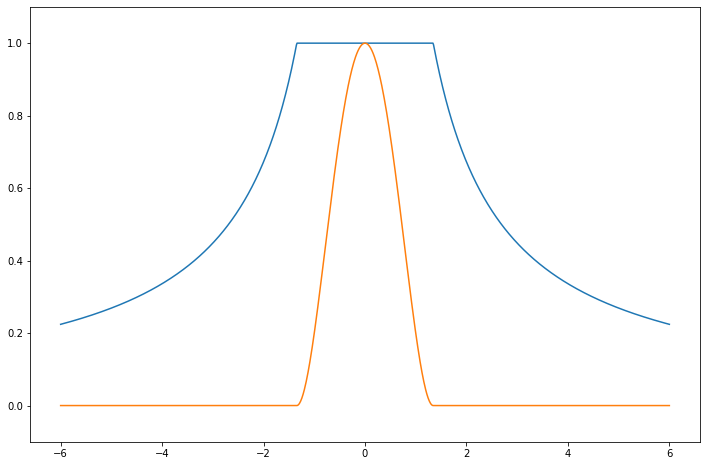

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
norms = sm.robust.norms

# 建模
r = np.linspace(-6,6,1000)
huber = norms.HuberT(t=1.345)
tukey = norms.TukeyBiweight(c=1.345)

import matplotlib.pyplot as plt
# huber图像
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(r,huber.weights(r))
ax.set_ylim(-0.1,1.1)

# tukey图像
ax.plot(r,tukey.weights(r))